In [26]:
# import the lottery_results_final.json file
import json

with open('lottery_results_final.json', 'r') as file:
    data = json.load(file)

len(data)

1083

In [10]:
import pandas as pd
from collections import Counter

def analyze_winning_numbers():
    # Read the CSV file
    df = pd.read_csv('lottery_results.csv')
    
    # Filter for dates after July 2019 (RNG era)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'] >= '2019-07-01']
    
    # Combine all main numbers into a single list
    all_numbers = []
    for i in range(1, 8):  # 7 main numbers
        column = f'Main Numbers {i}'
        # Convert to integers and add to list
        numbers = df[column].astype(str).str.strip().astype(int).tolist()
        all_numbers.extend(numbers)
    
    # Count frequency of each number
    number_counts = Counter(all_numbers)
    
    # Get the total number of draws
    total_draws = len(df)
    
    # Calculate probability for each number
    probabilities = {
        num: {
            'count': count,
            'probability': (count / total_draws) * 100
        }
        for num, count in number_counts.items()
    }
    
    # Sort by frequency, highest to lowest
    sorted_numbers = sorted(probabilities.items(), key=lambda x: x[1]['count'], reverse=True)
    
    print(f"\nAnalysis based on {total_draws} draws:\n")
    print("Top 20 Most Frequent Numbers:")
    print("Number | Times Drawn | Probability")
    print("-" * 35)
    for num, stats in sorted_numbers[:20]:
        print(f"{num:2d} | {stats['count']:11d} | {stats['probability']:6.2f}%")
    
    print("\nRecommended 7 numbers based on historical frequency:")
    recommended = [num for num, _ in sorted_numbers[:7]]
    print(sorted(recommended))

analyze_winning_numbers()



Analysis based on 566 draws:

Top 20 Most Frequent Numbers:
Number | Times Drawn | Probability
-----------------------------------
19 |          94 |  16.61%
46 |          94 |  16.61%
32 |          91 |  16.08%
36 |          91 |  16.08%
 7 |          89 |  15.72%
26 |          89 |  15.72%
28 |          89 |  15.72%
22 |          88 |  15.55%
 2 |          87 |  15.37%
30 |          87 |  15.37%
38 |          87 |  15.37%
40 |          86 |  15.19%
 9 |          84 |  14.84%
25 |          84 |  14.84%
31 |          84 |  14.84%
39 |          84 |  14.84%
18 |          83 |  14.66%
 4 |          83 |  14.66%
 1 |          82 |  14.49%
 5 |          82 |  14.49%

Recommended 7 numbers based on historical frequency:
[7, 19, 26, 28, 32, 36, 46]


In [46]:
import pandas as pd
from collections import Counter
from itertools import combinations

def analyze_number_combinations():
    # Read the CSV file
    df = pd.read_csv('lottery_results.csv')
    
    # Filter for dates after July 2019 (RNG era)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'] >= '2019-07-01']
    
    # Create a list of all 7-number combinations from each draw
    all_combinations = []
    for index, row in df.iterrows():
        numbers = [
            int(row[f'Main Numbers {i}']) 
            for i in range(1, 8)
        ]
        all_combinations.append(tuple(sorted(numbers)))
    
    # Count frequency of each combination
    combination_counts = Counter(all_combinations)
    
    # Calculate pair frequencies (numbers that appear together)
    pair_counts = Counter()
    for combo in all_combinations:
        # Get all possible pairs from the 7 numbers
        pairs = list(combinations(combo, 2))
        pair_counts.update(pairs)
    
    total_draws = len(df)
    
    print(f"\nAnalysis based on {total_draws} draws:\n")
    
    # Most common pairs
    print("\nMost Common Pairs of Numbers:")
    print("Pair | Times Drawn | Probability")
    print("-" * 35)
    for pair, count in pair_counts.most_common(10):
        prob = (count / total_draws) * 100
        print(f"{str(pair):15s} | {count:11d} | {prob:6.2f}%")
    
    # Analyze consecutive numbers
    consecutive_counts = Counter()
    for combo in all_combinations:
        for i in range(len(combo)-1):
            if combo[i+1] - combo[i] == 1:
                consecutive_counts.update([(combo[i], combo[i+1])])
    
    print("\nMost Common Consecutive Number Pairs:")
    print("Consecutive Pair | Times Drawn | Probability")
    print("-" * 45)
    for pair, count in consecutive_counts.most_common(10):
        prob = (count / total_draws) * 100
        print(f"{str(pair):15s} | {count:11d} | {prob:6.2f}%")

analyze_number_combinations()


Analysis based on 560 draws:


Most Common Pairs of Numbers:
Pair | Times Drawn | Probability
-----------------------------------
(22, 46)        |          21 |   3.75%
(30, 37)        |          19 |   3.39%
(7, 18)         |          19 |   3.39%
(19, 46)        |          19 |   3.39%
(26, 28)        |          19 |   3.39%
(4, 44)         |          19 |   3.39%
(3, 19)         |          18 |   3.21%
(7, 30)         |          18 |   3.21%
(24, 48)        |          18 |   3.21%
(26, 46)        |          18 |   3.21%

Most Common Consecutive Number Pairs:
Consecutive Pair | Times Drawn | Probability
---------------------------------------------
(38, 39)        |          18 |   3.21%
(12, 13)        |          17 |   3.04%
(18, 19)        |          16 |   2.86%
(24, 25)        |          15 |   2.68%
(46, 47)        |          15 |   2.68%
(1, 2)          |          15 |   2.68%
(39, 40)        |          14 |   2.50%
(44, 45)        |          14 |   2.50%
(5, 6)          |  

In [59]:
import pandas as pd
from collections import Counter
from itertools import combinations
import random

def generate_smart_numbers(num_combinations=5):
    """
    Generate lottery numbers using both frequency and pair analysis
    """
    # Read and prepare data
    df = pd.read_csv('lottery_results.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'] >= '2019-07-01']
    
    # Get individual number frequencies
    all_numbers = []
    for i in range(1, 8):
        numbers = df[f'Main Numbers {i}'].astype(int).tolist()
        all_numbers.extend(numbers)
    
    number_freq = Counter(all_numbers)
    total_draws = len(df)
    
    # Get pair frequencies
    all_draws = []  # Renamed from all_combinations
    for _, row in df.iterrows():
        numbers = [int(row[f'Main Numbers {i}']) for i in range(1, 8)]
        all_draws.append(tuple(sorted(numbers)))
    
    pair_counts = Counter()
    for combo in all_draws:
        pairs = list(combinations(combo, 2))
        pair_counts.update(pairs)
    
    def calculate_pair_score(numbers):
        """Calculate how well the numbers work together based on historical pairs"""
        pairs = list(combinations(numbers, 2))
        score = sum(pair_counts[pair] for pair in pairs)
        return score
    
    def generate_combination():
        selected = []
        remaining = list(range(1, 51))
        
        # Start with a high-frequency number
        weights = [number_freq[n] for n in remaining]
        first_number = random.choices(remaining, weights=weights, k=1)[0]
        selected.append(first_number)
        remaining.remove(first_number)
        
        # Add remaining numbers considering both frequency and pairs
        while len(selected) < 7:
            scores = {}
            for num in remaining:
                # Calculate score based on:
                # 1. Individual frequency
                freq_score = number_freq[num] / total_draws
                
                # 2. Pair relationships with already selected numbers
                temp_numbers = selected + [num]
                pair_score = calculate_pair_score(temp_numbers) / len(temp_numbers)
                
                # 3. Balance factors
                high_low_balance = 1.0 if (
                    (num > 25 and sum(1 for x in selected if x > 25) < 4) or
                    (num <= 25 and sum(1 for x in selected if x > 25) >= 4)
                ) else 0.5
                
                even_odd_balance = 1.0 if (
                    (num % 2 == 0 and sum(1 for x in selected if x % 2 == 0) < 4) or
                    (num % 2 != 0 and sum(1 for x in selected if x % 2 == 0) >= 4)
                ) else 0.5
                
                # Combine scores (adjust weights as needed)
                scores[num] = (freq_score * 0.4 + 
                             pair_score * 0.4 + 
                             high_low_balance * 0.1 +
                             even_odd_balance * 0.1)
            
            # Select next number based on combined score
            next_number = max(scores.items(), key=lambda x: x[1])[0]
            selected.append(next_number)
            remaining.remove(next_number)
        
        return sorted(selected)
    
    # Generate multiple combinations
    generated_combinations = []  # Renamed from combinations
    for _ in range(num_combinations):
        combo = generate_combination()
        generated_combinations.append(combo)
        
        # Print analysis for each combination
        high_count = sum(1 for x in combo if x > 25)
        even_count = sum(1 for x in combo if x % 2 == 0)
        pair_score = calculate_pair_score(combo)
        
        print(f"\nCombination: {combo}")
        print(f"High/Low split: {high_count}/{7-high_count}")
        print(f"Even/Odd split: {even_count}/{7-even_count}")
        print(f"Pair strength score: {pair_score}")
        
        # Print frequency info for numbers
        print("Individual number frequencies:")
        for num in combo:
            freq = number_freq[num]
            prob = (freq / total_draws) * 100
            print(f"Number {num:2d}: {freq:3d} times ({prob:.1f}%)")
    
    return generated_combinations

# Generate 5 smart combinations
smart_combinations = generate_smart_numbers(5)


Combination: [21, 38, 40, 43, 46, 48, 50]
High/Low split: 6/1
Even/Odd split: 5/2
Pair strength score: 231
Individual number frequencies:
Number 21:  77 times (13.8%)
Number 38:  87 times (15.5%)
Number 40:  85 times (15.2%)
Number 43:  71 times (12.7%)
Number 46:  94 times (16.8%)
Number 48:  77 times (13.8%)
Number 50:  72 times (12.9%)

Combination: [6, 28, 36, 40, 46, 48, 50]
High/Low split: 6/1
Even/Odd split: 7/0
Pair strength score: 248
Individual number frequencies:
Number  6:  72 times (12.9%)
Number 28:  88 times (15.7%)
Number 36:  89 times (15.9%)
Number 40:  85 times (15.2%)
Number 46:  94 times (16.8%)
Number 48:  77 times (13.8%)
Number 50:  72 times (12.9%)

Combination: [30, 37, 46, 47, 48, 49, 50]
High/Low split: 7/0
Even/Odd split: 4/3
Pair strength score: 205
Individual number frequencies:
Number 30:  86 times (15.4%)
Number 37:  78 times (13.9%)
Number 46:  94 times (16.8%)
Number 47:  70 times (12.5%)
Number 48:  77 times (13.8%)
Number 49:  69 times (12.3%)
Numb

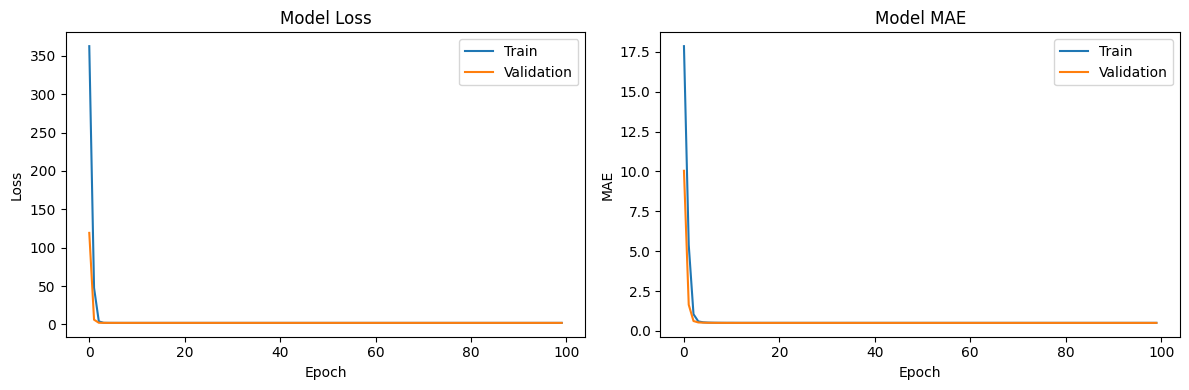


Training Analysis:
Minimum validation loss: 2.10 at epoch 99
Final validation loss: 2.10
Final validation MAE: 0.50

Overfitting Analysis:
Final training loss: 2.09
Final validation loss: 2.10
Loss difference: 0.01
Loss ratio: 1.01

Convergence Analysis:
Standard deviation of last 5 validation losses: 0.0000
Model appears to have converged (stable validation loss)


In [48]:
import matplotlib.pyplot as plt

def analyze_training(history):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Analyze convergence
    min_val_loss = min(history.history['val_loss'])
    min_val_loss_epoch = history.history['val_loss'].index(min_val_loss)
    
    print("\nTraining Analysis:")
    print(f"Minimum validation loss: {min_val_loss:.2f} at epoch {min_val_loss_epoch + 1}")
    print(f"Final validation loss: {history.history['val_loss'][-1]:.2f}")
    print(f"Final validation MAE: {history.history['val_mae'][-1]:.2f}")
    
    # Check for overfitting
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    loss_diff = abs(train_loss - val_loss)
    loss_ratio = max(train_loss, val_loss) / min(train_loss, val_loss)
    
    print("\nOverfitting Analysis:")
    print(f"Final training loss: {train_loss:.2f}")
    print(f"Final validation loss: {val_loss:.2f}")
    print(f"Loss difference: {loss_diff:.2f}")
    print(f"Loss ratio: {loss_ratio:.2f}")
    
    if loss_ratio > 1.2:
        print("Warning: Possible overfitting detected (loss ratio > 1.2)")
    
    # Convergence check
    last_5_val_loss = history.history['val_loss'][-5:]
    val_loss_std = np.std(last_5_val_loss)
    print(f"\nConvergence Analysis:")
    print(f"Standard deviation of last 5 validation losses: {val_loss_std:.4f}")
    if val_loss_std < 0.1:
        print("Model appears to have converged (stable validation loss)")
    else:
        print("Model might benefit from more training (validation loss still varying)")

# After training the model:
analyze_training(history)

In [49]:
from collections import Counter
import pandas as pd

def analyze_lottery_statistics():
    # Read and filter data
    df = pd.read_csv('lottery_results.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'] >= '2019-07-01']
    
    # Analyze number frequencies
    all_numbers = []
    for i in range(1, 8):
        numbers = df[f'Main Numbers {i}'].tolist()
        all_numbers.extend(numbers)
    
    freq = Counter(all_numbers)
    
    # Calculate statistics
    total_draws = len(df)
    expected_freq = total_draws * 7 / 50  # Expected frequency if truly random
    
    print(f"\nStatistical Analysis ({total_draws} draws):")
    print(f"Expected frequency per number: {expected_freq:.1f}")
    print("\nMost common numbers:")
    for num, count in freq.most_common(10):
        deviation = ((count - expected_freq) / expected_freq) * 100
        print(f"Number {num:2d}: {count:3d} times (deviation: {deviation:+.1f}%)")
    
    # Chi-square test for randomness
    chi_square = sum((count - expected_freq) ** 2 / expected_freq 
                    for count in freq.values())
    print(f"\nChi-square statistic: {chi_square:.2f}")
    
    # Additional analysis: Least common numbers
    print("\nLeast common numbers:")
    for num, count in sorted(freq.items(), key=lambda x: x[1])[:10]:
        deviation = ((count - expected_freq) / expected_freq) * 100
        print(f"Number {num:2d}: {count:3d} times (deviation: {deviation:+.1f}%)")
    
    return freq

# Run statistical analysis
frequencies = analyze_lottery_statistics()


Statistical Analysis (560 draws):
Expected frequency per number: 78.4

Most common numbers:
Number 19:  94 times (deviation: +19.9%)
Number 46:  94 times (deviation: +19.9%)
Number 32:  90 times (deviation: +14.8%)
Number 36:  89 times (deviation: +13.5%)
Number  7:  88 times (deviation: +12.2%)
Number 26:  88 times (deviation: +12.2%)
Number 28:  88 times (deviation: +12.2%)
Number 22:  87 times (deviation: +11.0%)
Number 38:  87 times (deviation: +11.0%)
Number 30:  86 times (deviation: +9.7%)

Chi-square statistic: 35.18

Least common numbers:
Number 20:  66 times (deviation: -15.8%)
Number 27:  66 times (deviation: -15.8%)
Number 41:  66 times (deviation: -15.8%)
Number 10:  68 times (deviation: -13.3%)
Number 42:  68 times (deviation: -13.3%)
Number  8:  69 times (deviation: -12.0%)
Number 49:  69 times (deviation: -12.0%)
Number 33:  70 times (deviation: -10.7%)
Number 47:  70 times (deviation: -10.7%)
Number 43:  71 times (deviation: -9.4%)


In [52]:
import math
from itertools import combinations
import random

def calculate_optimal_combinations():
    total_numbers = 50
    numbers_to_pick = 7
    
    # Base probability of winning jackpot
    jackpot_combinations = math.comb(total_numbers, numbers_to_pick)
    base_probability = 1 / jackpot_combinations
    print(f"\nProbability Analysis:")
    print(f"Total possible combinations: {jackpot_combinations:,}")
    print(f"Base probability of jackpot: 1 in {jackpot_combinations:,}")
    
    # Probability and prize tiers for smaller wins
    prize_tiers = {
        7: "Division 1 (Jackpot)",
        6: "Division 2",
        5: "Division 3",
        4: "Division 4",
        3: "Division 5"
    }
    
    print("\nProbability by Prize Division:")
    for matches in range(3, 8):
        ways_to_match = math.comb(7, matches) * math.comb(43, 7-matches)
        probability = ways_to_match / math.comb(50, 7)
        print(f"{prize_tiers[matches]}: 1 in {1/probability:.2f}")

def generate_optimal_coverage(budget, ticket_cost=1):
    num_tickets = budget // ticket_cost
    print(f"\nGenerating optimal coverage for {num_tickets} tickets...")
    
    combinations = []
    base_numbers = list(range(1, 51))
    
    for i in range(num_tickets):
        # Use systematic spacing with some randomization
        start_idx = i % 44  # 50 - 7 + 1
        base_combo = base_numbers[start_idx:start_idx+7]
        
        # Add some randomization to avoid pure sequential numbers
        if random.random() < 0.3:  # 30% chance to modify
            random_idx = random.randint(0, 6)
            available = set(range(1, 51)) - set(base_combo)
            base_combo[random_idx] = random.choice(list(available))
        
        combinations.append(sorted(base_combo))
    
    # Analyze coverage
    numbers_used = set()
    for combo in combinations:
        numbers_used.update(combo)
    
    print(f"Number coverage: {len(numbers_used)}/50 numbers used")
    print(f"Average gap between numbers: {calculate_average_gap(combinations):.2f}")
    
    return combinations

def generate_balanced_tickets(num_tickets=10):
    balanced_tickets = []
    attempts = 0
    max_attempts = num_tickets * 100  # Prevent infinite loops
    
    def is_balanced(combination):
        high_count = sum(1 for x in combination if x > 25)
        even_count = sum(1 for x in combination if x % 2 == 0)
        gaps = [combination[i+1] - combination[i] for i in range(len(combination)-1)]
        
        return (2 <= high_count <= 5 and  # Balance high/low
                2 <= even_count <= 5 and  # Balance even/odd
                max(gaps) <= 15)          # Avoid large gaps
    
    while len(balanced_tickets) < num_tickets and attempts < max_attempts:
        attempts += 1
        # Generate random combination
        combo = sorted(random.sample(range(1, 51), 7))
        
        if is_balanced(combo) and combo not in balanced_tickets:
            balanced_tickets.append(combo)
    
    print(f"\nGenerated {len(balanced_tickets)} balanced tickets after {attempts} attempts")
    analyze_tickets(balanced_tickets)
    
    return balanced_tickets

def calculate_average_gap(combinations):
    total_gaps = 0
    gap_count = 0
    
    for combo in combinations:
        for i in range(len(combo)-1):
            total_gaps += combo[i+1] - combo[i]
            gap_count += 1
    
    return total_gaps / gap_count if gap_count > 0 else 0

def analyze_tickets(tickets):
    """Analyze the characteristics of generated tickets"""
    high_low_ratios = []
    even_odd_ratios = []
    
    for combo in tickets:
        high_count = sum(1 for x in combo if x > 25)
        even_count = sum(1 for x in combo if x % 2 == 0)
        
        high_low_ratios.append(high_count / 7)
        even_odd_ratios.append(even_count / 7)
    
    print("\nTicket Analysis:")
    print(f"Average high/low ratio: {sum(high_low_ratios)/len(high_low_ratios):.2f}")
    print(f"Average even/odd ratio: {sum(even_odd_ratios)/len(even_odd_ratios):.2f}")

# Example usage
calculate_optimal_combinations()
optimal_tickets = generate_optimal_coverage(budget=100)
balanced_tickets = generate_balanced_tickets(num_tickets=5)

# Print example tickets
print("\nExample Optimal Tickets:")
for i, ticket in enumerate(optimal_tickets[:5], 1):
    print(f"Ticket {i}: {ticket}")

print("\nExample Balanced Tickets:")
for i, ticket in enumerate(balanced_tickets[:5], 1):
    print(f"Ticket {i}: {ticket}")


Probability Analysis:
Total possible combinations: 99,884,400
Base probability of jackpot: 1 in 99,884,400

Probability by Prize Division:
Division 5: 1 in 23.12
Division 4: 1 in 231.25
Division 3: 1 in 5267.33
Division 2: 1 in 331841.86
Division 1 (Jackpot): 1 in 99884400.00

Generating optimal coverage for 100 tickets...
Number coverage: 50/50 numbers used
Average gap between numbers: 1.99

Generated 5 balanced tickets after 14 attempts

Ticket Analysis:
Average high/low ratio: 0.49
Average even/odd ratio: 0.54

Example Optimal Tickets:
Ticket 1: [1, 2, 3, 4, 5, 6, 7]
Ticket 2: [2, 4, 5, 6, 7, 8, 25]
Ticket 3: [3, 4, 5, 6, 7, 8, 9]
Ticket 4: [2, 4, 5, 6, 8, 9, 10]
Ticket 5: [5, 6, 7, 8, 9, 10, 11]

Example Balanced Tickets:
Ticket 1: [3, 8, 12, 17, 26, 33, 40]
Ticket 2: [8, 12, 17, 21, 28, 40, 45]
Ticket 3: [10, 17, 29, 30, 33, 36, 37]
Ticket 4: [6, 10, 13, 28, 30, 35, 48]
Ticket 5: [10, 11, 15, 19, 20, 33, 38]


In [53]:
import random
from collections import Counter

def generate_smart_tickets(num_tickets=10, historical_weight=0.3):
    """
    Generate tickets using both historical frequencies and balanced distribution
    historical_weight: 0-1 value determining how much to factor in historical frequencies
    """
    # Get historical frequencies
    freq_data = analyze_lottery_statistics()  # Using your existing function
    
    # Calculate probability weights for each number
    total_draws = sum(freq_data.values())
    weights = {num: count/total_draws for num, count in freq_data.items()}
    
    def smart_number_selection():
        selected = []
        remaining = list(range(1, 51))
        
        while len(selected) < 7:
            # Calculate combined score for each remaining number
            scores = {}
            for num in remaining:
                # Historical frequency score
                freq_score = weights[num]
                
                # Balance score (if we already have some numbers)
                if selected:
                    high_count = sum(1 for x in selected if x > 25)
                    even_count = sum(1 for x in selected if x % 2 == 0)
                    
                    # Calculate balance factors
                    high_low_balance = 1.0 if ((num > 25 and high_count < 4) or 
                                             (num <= 25 and high_count >= 4)) else 0.5
                    even_odd_balance = 1.0 if ((num % 2 == 0 and even_count < 4) or 
                                             (num % 2 != 0 and even_count >= 4)) else 0.5
                    
                    # Gap score (prefer numbers with reasonable gaps)
                    if len(selected) > 0:
                        closest_gap = min(abs(num - x) for x in selected)
                        gap_score = 1.0 if 2 <= closest_gap <= 8 else 0.5
                    else:
                        gap_score = 1.0
                    
                    balance_score = (high_low_balance + even_odd_balance + gap_score) / 3
                else:
                    balance_score = 1.0
                
                # Combine scores
                scores[num] = (freq_score * historical_weight + 
                             balance_score * (1 - historical_weight))
            
            # Select number based on scores
            chosen = random.choices(
                population=list(scores.keys()),
                weights=list(scores.values()),
                k=1
            )[0]
            
            selected.append(chosen)
            remaining.remove(chosen)
        
        return sorted(selected)
    
    # Generate tickets
    tickets = []
    attempts = 0
    max_attempts = num_tickets * 100
    
    while len(tickets) < num_tickets and attempts < max_attempts:
        ticket = smart_number_selection()
        if ticket not in tickets:  # Avoid duplicates
            tickets.append(ticket)
        attempts += 1
    
    # Analyze generated tickets
    print(f"\nGenerated {len(tickets)} smart tickets:")
    analyze_smart_tickets(tickets, freq_data)
    
    return tickets

def analyze_smart_tickets(tickets, freq_data):
    """Analyze the characteristics of generated smart tickets"""
    print("\nTicket Analysis:")
    
    # Frequency analysis
    used_numbers = []
    for ticket in tickets:
        used_numbers.extend(ticket)
    number_freq = Counter(used_numbers)
    
    # Most used high-frequency numbers
    most_common = freq_data.most_common(10)
    high_freq_coverage = sum(1 for num, _ in most_common if num in number_freq)
    print(f"Coverage of top 10 historical numbers: {high_freq_coverage}/10")
    
    # Balance statistics
    high_low_ratios = []
    even_odd_ratios = []
    
    for ticket in tickets:
        high_count = sum(1 for x in ticket if x > 25)
        even_count = sum(1 for x in ticket if x % 2 == 0)
        
        high_low_ratios.append(high_count / 7)
        even_odd_ratios.append(even_count / 7)
    
    print(f"Average high/low ratio: {sum(high_low_ratios)/len(high_low_ratios):.2f}")
    print(f"Average even/odd ratio: {sum(even_odd_ratios)/len(even_odd_ratios):.2f}")
    
    # Print example tickets
    print("\nExample Tickets:")
    for i, ticket in enumerate(tickets[:5], 1):
        high_freq_nums = sum(1 for num in ticket if num in [n for n, _ in most_common])
        print(f"Ticket {i}: {ticket} (Contains {high_freq_nums} frequent numbers)")

# Generate some smart tickets
smart_tickets = generate_smart_tickets(num_tickets=10, historical_weight=0.3)


Statistical Analysis (560 draws):
Expected frequency per number: 78.4

Most common numbers:
Number 19:  94 times (deviation: +19.9%)
Number 46:  94 times (deviation: +19.9%)
Number 32:  90 times (deviation: +14.8%)
Number 36:  89 times (deviation: +13.5%)
Number  7:  88 times (deviation: +12.2%)
Number 26:  88 times (deviation: +12.2%)
Number 28:  88 times (deviation: +12.2%)
Number 22:  87 times (deviation: +11.0%)
Number 38:  87 times (deviation: +11.0%)
Number 30:  86 times (deviation: +9.7%)

Chi-square statistic: 35.18

Least common numbers:
Number 20:  66 times (deviation: -15.8%)
Number 27:  66 times (deviation: -15.8%)
Number 41:  66 times (deviation: -15.8%)
Number 10:  68 times (deviation: -13.3%)
Number 42:  68 times (deviation: -13.3%)
Number  8:  69 times (deviation: -12.0%)
Number 49:  69 times (deviation: -12.0%)
Number 33:  70 times (deviation: -10.7%)
Number 47:  70 times (deviation: -10.7%)
Number 43:  71 times (deviation: -9.4%)

Generated 10 smart tickets:

Ticket 

In [55]:
import random
from collections import Counter
import math
import pandas as pd

def generate_hybrid_tickets(num_tickets=10, randomness_factor=0.3, historical_weight=0.4):
    """
    Generate lottery tickets using a hybrid approach combining random and smart selection
    
    Parameters:
    - num_tickets: Number of tickets to generate
    - randomness_factor: 0-1, higher means more pure random tickets
    - historical_weight: 0-1, influence of historical frequencies in smart selection
    """
    tickets = []
    freq_data = analyze_lottery_statistics()  # Get historical data
    
    def generate_smart_ticket():
        selected = []
        remaining = list(range(1, 51))
        total_draws = sum(freq_data.values())
        weights = {num: count/total_draws for num, count in freq_data.items()}
        
        while len(selected) < 7:
            scores = {}
            for num in remaining:
                # Historical frequency score
                freq_score = weights.get(num, 0)
                
                # Balance factors
                if selected:
                    high_count = sum(1 for x in selected if x > 25)
                    even_count = sum(1 for x in selected if x % 2 == 0)
                    
                    # Calculate various balance scores
                    high_low_balance = 1.0 if ((num > 25 and high_count < 4) or 
                                             (num <= 25 and high_count >= 4)) else 0.5
                    even_odd_balance = 1.0 if ((num % 2 == 0 and even_count < 4) or 
                                             (num % 2 != 0 and even_count >= 4)) else 0.5
                    
                    # Gap analysis
                    closest_gap = min(abs(num - x) for x in selected)
                    gap_score = 1.0 if 2 <= closest_gap <= 8 else 0.5
                    
                    balance_score = (high_low_balance + even_odd_balance + gap_score) / 3
                else:
                    balance_score = 1.0
                
                # Combine scores with weights
                scores[num] = (freq_score * historical_weight + 
                             balance_score * (1 - historical_weight))
            
            # Select number based on weighted scores
            chosen = random.choices(
                population=list(scores.keys()),
                weights=list(scores.values()),
                k=1
            )[0]
            
            selected.append(chosen)
            remaining.remove(chosen)
        
        return sorted(selected)
    
    # Generate tickets using hybrid approach
    attempts = 0
    max_attempts = num_tickets * 100
    
    while len(tickets) < num_tickets and attempts < max_attempts:
        attempts += 1
        
        if random.random() < randomness_factor:
            # Pure random selection
            ticket = sorted(random.sample(range(1, 51), 7))
        else:
            # Smart balanced selection
            ticket = generate_smart_ticket()
        
        if ticket not in tickets:  # Avoid duplicates
            tickets.append(ticket)
    
    # Analyze and display results
    print(f"\nGenerated {len(tickets)} hybrid tickets:")
    print(f"Randomness factor: {randomness_factor:.2f}")
    print(f"Historical weight: {historical_weight:.2f}")
    analyze_hybrid_tickets(tickets, freq_data)
    
    return tickets

def analyze_hybrid_tickets(tickets, freq_data):
    """Detailed analysis of generated tickets"""
    print("\nTicket Analysis:")
    
    # Frequency analysis
    used_numbers = []
    for ticket in tickets:
        used_numbers.extend(ticket)
    number_freq = Counter(used_numbers)
    
    # Coverage analysis
    most_common_hist = freq_data.most_common(10)
    high_freq_coverage = sum(1 for num, _ in most_common_hist if num in number_freq)
    
    # Statistical measures
    high_low_ratios = []
    even_odd_ratios = []
    gaps = []
    
    for ticket in tickets:
        high_count = sum(1 for x in ticket if x > 25)
        even_count = sum(1 for x in ticket if x % 2 == 0)
        
        high_low_ratios.append(high_count / 7)
        even_odd_ratios.append(even_count / 7)
        
        # Calculate gaps
        for i in range(len(ticket)-1):
            gaps.append(ticket[i+1] - ticket[i])
    
    # Print analysis
    print(f"\nCoverage Statistics:")
    print(f"Top 10 historical numbers coverage: {high_freq_coverage}/10")
    print(f"Number range coverage: {len(set(used_numbers))}/50")
    
    print(f"\nBalance Metrics:")
    print(f"Average high/low ratio: {sum(high_low_ratios)/len(high_low_ratios):.2f}")
    print(f"Average even/odd ratio: {sum(even_odd_ratios)/len(even_odd_ratios):.2f}")
    print(f"Average gap between numbers: {sum(gaps)/len(gaps):.2f}")
    
    # Print example tickets with analysis
    print("\nExample Tickets:")
    for i, ticket in enumerate(tickets[:5], 1):
        high_freq_nums = sum(1 for num in ticket if num in [n for n, _ in most_common_hist])
        print(f"Ticket {i}: {ticket}")
        print(f"Contains {high_freq_nums} frequent numbers")
        print(f"High/Low: {sum(1 for x in ticket if x > 25)}/{sum(1 for x in ticket if x <= 25)}")
        print(f"Even/Odd: {sum(1 for x in ticket if x % 2 == 0)}/{sum(1 for x in ticket if x % 2 != 0)}")
        print()

# Let's try different strategies
#print("Strategy 1: More Random")
#random_heavy = generate_hybrid_tickets(num_tickets=5, randomness_factor=0.7, historical_weight=0.3)

print("\nStrategy 2: More Balanced")
balanced_heavy = generate_hybrid_tickets(num_tickets=5, randomness_factor=0.3, historical_weight=0.7)

#print("\nStrategy 3: Equal Mix")
#balanced_mix = generate_hybrid_tickets(num_tickets=5, randomness_factor=0.5, historical_weight=0.5)


Strategy 2: More Balanced

Statistical Analysis (560 draws):
Expected frequency per number: 78.4

Most common numbers:
Number 19:  94 times (deviation: +19.9%)
Number 46:  94 times (deviation: +19.9%)
Number 32:  90 times (deviation: +14.8%)
Number 36:  89 times (deviation: +13.5%)
Number  7:  88 times (deviation: +12.2%)
Number 26:  88 times (deviation: +12.2%)
Number 28:  88 times (deviation: +12.2%)
Number 22:  87 times (deviation: +11.0%)
Number 38:  87 times (deviation: +11.0%)
Number 30:  86 times (deviation: +9.7%)

Chi-square statistic: 35.18

Least common numbers:
Number 20:  66 times (deviation: -15.8%)
Number 27:  66 times (deviation: -15.8%)
Number 41:  66 times (deviation: -15.8%)
Number 10:  68 times (deviation: -13.3%)
Number 42:  68 times (deviation: -13.3%)
Number  8:  69 times (deviation: -12.0%)
Number 49:  69 times (deviation: -12.0%)
Number 33:  70 times (deviation: -10.7%)
Number 47:  70 times (deviation: -10.7%)
Number 43:  71 times (deviation: -9.4%)

Generated

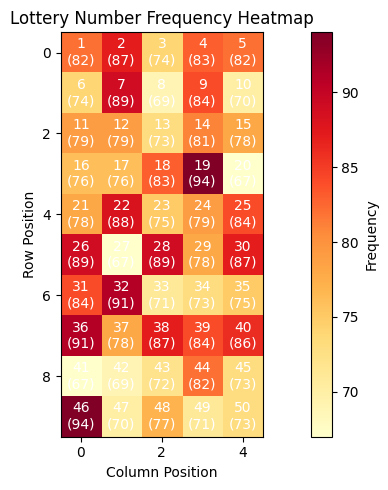

In [83]:
from sklearn.cluster import KMeans

def map_numbers_to_grid():
    grid = {}
    number = 1
    for row in range(1, 11):  # 10 rows
        for col in range(1, 6):  # 5 columns
            if number <= 50:
                grid[number] = (row, col)
                number += 1
    return grid

grid_positions = map_numbers_to_grid()

# First get the frequency data
def analyze_lottery_statistics():
    # Read and filter data
    df = pd.read_csv('lottery_results.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'] >= '2019-07-01']
    
    # Analyze number frequencies
    all_numbers = []
    for i in range(1, 8):
        numbers = df[f'Main Numbers {i}'].tolist()
        all_numbers.extend(numbers)
    
    freq = Counter(all_numbers)
    return freq

# Get the frequency data
freq_data = analyze_lottery_statistics()

def plot_lottery_heatmap(freq_data):
    """Create a heatmap using actual lottery frequency data"""
    plt.figure(figsize=(10, 5))
    
    # Create heatmap data
    heatmap_data = np.zeros((10, 5))
    max_freq = max(freq_data.values())
    
    # Fill the heatmap data
    for number, freq in freq_data.items():
        if number in grid_positions:
            row, col = grid_positions[number]
            heatmap_data[row-1, col-1] = freq
    
    # Create heatmap
    plt.imshow(heatmap_data, cmap='YlOrRd')
    plt.colorbar(label='Frequency')
    
    # Add number labels and frequencies
    for number, (row, col) in grid_positions.items():
        if number in freq_data:
            freq = freq_data[number]
            plt.text(col-1, row-1, f'{number}\n({freq})', 
                    ha='center', va='center',
                    color='black' if heatmap_data[row-1, col-1] < max_freq/2 else 'white')
    
    plt.title('Lottery Number Frequency Heatmap')
    plt.xlabel('Column Position')
    plt.ylabel('Row Position')
    plt.tight_layout()
    plt.show()
    
    return heatmap_data  # Add this return statement

# Now plot with actual frequency data
heatmap_data = plot_lottery_heatmap(freq_data)

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 3, 3, 16)       │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 3, 3, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 3, 3, 32)       │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 3, 3, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,169 (82.69 KB)

 Trainable params: 20,945 (81.82 KB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.3812 - auc: 0.3293 - loss: 3.9243 - precision: 0.2906 - recall: 0.4028 - val_accuracy: 0.4000 - val_auc: 0.7500 - val_loss: 3.2580 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4625 - auc: 0.4106 - loss: 3.7099 - precision: 0.3498 - recall: 0.4306 - val_accuracy: 0.4000 - val_auc: 0.6667 - val_loss: 3.2457 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5104 - auc: 0.5798 - loss: 3.3585 - precision: 0.4125 - recall: 0.5128 - val_accuracy: 0.4000 - val_auc: 0.5833 - val_loss: 3.2323 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5167 - auc: 0.5429 - loss: 3.4227 - precision: 0.4339 - recall: 0.5655 - val_accuracy: 0.4000 - val_auc: 0.5417

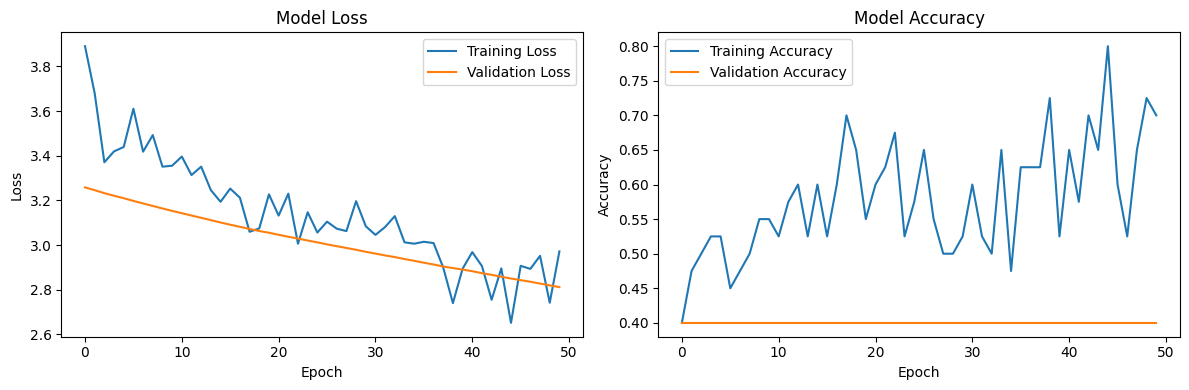


Model Performance:
Validation loss: 2.8113
Validation accuracy: 0.4000
Validation auc: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000

Predicted winning numbers: [2, 4, 5, 20, 25, 32, 46]

Top 10 Numbers by Prediction Probability:
Number | Probability
--------------------
    25 | 0.4367
     5 | 0.4350
     2 | 0.4342
    46 | 0.4294
     4 | 0.4261
    20 | 0.4259
    32 | 0.4256
     7 | 0.4243
    19 | 0.4238
    15 | 0.4224


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers
import tensorflow as tf
from collections import Counter
import random

def analyze_lottery_statistics():
    df = pd.read_csv('lottery_results.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'] >= '2019-07-01']
    
    all_numbers = []
    for i in range(1, 8):
        numbers = df[f'Main Numbers {i}'].tolist()
        all_numbers.extend(numbers)
    
    freq = Counter(all_numbers)
    return freq

def map_numbers_to_grid():
    grid = {}
    number = 1
    for row in range(1, 11):
        for col in range(1, 6):
            if number <= 50:
                grid[number] = (row, col)
                number += 1
    return grid

def prepare_winning_data(df, grid_positions, window_size=3):
    """Prepare data with better balance and representation"""
    # Create frequency map of winning numbers
    winning_freq = Counter()
    for index, row in df.iterrows():
        numbers = [int(row[f'Main Numbers {i}']) for i in range(1, 8)]
        winning_freq.update(numbers)
    
    # Create normalized frequency heatmap
    freq_data = analyze_lottery_statistics()
    max_freq = max(freq_data.values())
    heatmap = np.zeros((10, 5))
    for number, (row, col) in grid_positions.items():
        heatmap[row-1, col-1] = freq_data.get(number, 0) / max_freq
    
    # Generate balanced samples
    X_samples = []
    y_samples = []
    
    for number, (row, col) in grid_positions.items():
        # Create window with center at current position
        window = np.zeros((window_size, window_size))
        
        # Fill window with normalized frequencies
        for i in range(window_size):
            for j in range(window_size):
                r = row - 1 - window_size//2 + i
                c = col - 1 - window_size//2 + j
                if 0 <= r < 10 and 0 <= c < 5:
                    window[i, j] = heatmap[r, c]
        
        # Label as 1 if number appears in winning numbers more than average
        avg_wins = sum(winning_freq.values()) / len(winning_freq)
        is_frequent_winner = winning_freq.get(number, 0) > avg_wins
        
        X_samples.append(window)
        y_samples.append(1 if is_frequent_winner else 0)
    
    # Convert to numpy arrays
    X = np.array(X_samples)[..., np.newaxis]
    y = np.array(y_samples)
    
    return X, y


def build_prediction_model(input_shape):
    """Build a more stable model with stronger regularization"""
    model = models.Sequential([
        layers.Input(shape=input_shape),
        
        # First conv block with dropout
        layers.Conv2D(16, (2, 2), 
                     activation='relu', 
                     padding='same',
                     kernel_regularizer=tf.keras.regularizers.l2(0.02)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Second conv block
        layers.Conv2D(32, (2, 2), 
                     activation='relu',
                     padding='same',
                     kernel_regularizer=tf.keras.regularizers.l2(0.02)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Dense layers
        layers.Flatten(),
        layers.Dense(64, 
                    activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(0.02)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1),
        metrics=['accuracy', 
                tf.keras.metrics.AUC(name='auc'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')]
    )
    return model

def predict_numbers(model, grid_positions, num_picks=7):
    """Generate predictions with better selection strategy"""
    predictions = []
    
    # Create normalized frequency heatmap
    freq_data = analyze_lottery_statistics()
    max_freq = max(freq_data.values())
    heatmap = np.zeros((10, 5))
    for number, (row, col) in grid_positions.items():
        heatmap[row-1, col-1] = freq_data.get(number, 0) / max_freq
    
    # Generate predictions
    for number, (row, col) in grid_positions.items():
        window = np.zeros((3, 3))
        for i in range(3):
            for j in range(3):
                r = row - 1 - 1 + i
                c = col - 1 - 1 + j
                if 0 <= r < 10 and 0 <= c < 5:
                    window[i, j] = heatmap[r, c]
        
        pred = model.predict(window[np.newaxis, ..., np.newaxis], verbose=0)[0][0]
        predictions.append((number, pred))
    
    # Sort by prediction probability and historical frequency
    predictions.sort(key=lambda x: (x[1], freq_data.get(x[0], 0)), reverse=True)
    
    return [num for num, _ in predictions[:num_picks]], predictions

def plot_lottery_heatmap(freq_data):
    """Create a heatmap using actual lottery frequency data"""
    plt.figure(figsize=(10, 5))
    
    # Create heatmap data
    heatmap_data = np.zeros((10, 5))
    max_freq = max(freq_data.values())
    
    # Fill the heatmap data
    grid_positions = map_numbers_to_grid()
    for number, freq in freq_data.items():
        if number in grid_positions:
            row, col = grid_positions[number]
            heatmap_data[row-1, col-1] = freq
    
    # Create heatmap
    plt.imshow(heatmap_data, cmap='YlOrRd')
    plt.colorbar(label='Frequency')
    
    # Add number labels and frequencies
    for number, (row, col) in grid_positions.items():
        if number in freq_data:
            freq = freq_data[number]
            plt.text(col-1, row-1, f'{number}\n({freq})', 
                    ha='center', va='center',
                    color='black' if heatmap_data[row-1, col-1] < max_freq/2 else 'white')
    
    plt.title('Lottery Number Frequency Heatmap')
    plt.xlabel('Column Position')
    plt.ylabel('Row Position')
    plt.tight_layout()
    plt.show()
    
    return heatmap_data

# Main execution
if __name__ == "__main__":
    # Prepare data
    df = pd.read_csv('lottery_results.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'] >= '2019-07-01']

    grid_positions = map_numbers_to_grid()
    X, y = prepare_winning_data(df, grid_positions, window_size=3)

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build and train model
    prediction_model = build_prediction_model(input_shape=X.shape[1:])
    prediction_model.summary()

    # Training parameters
    batch_size = 32
    epochs = 50

    # Add class weights to handle imbalance
    class_weights = {
        0: 1.0,
        1: 1.0  # Reduced from 2.0 to prevent overfitting
    }

    # Early stopping with more patience
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Reduced learning rate schedule
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.00001
    )

    # Training with updated parameters
    history = prediction_model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_val, y_val),
        class_weight=class_weights,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print model performance metrics
    print("\nModel Performance:")
    metrics = prediction_model.evaluate(X_val, y_val, verbose=0)
    metric_names = ['loss', 'accuracy', 'auc', 'precision', 'recall']

    for name, value in zip(metric_names, metrics):
        print(f"Validation {name}: {value:.4f}")

    # Generate and display predictions
    predicted_numbers, all_predictions = predict_numbers(prediction_model, grid_positions)
    print("\nPredicted winning numbers:", sorted(predicted_numbers))

    # Print top predictions with probabilities
    print("\nTop 10 Numbers by Prediction Probability:")
    print("Number | Probability")
    print("-" * 20)
    for number, prob in sorted(all_predictions, key=lambda x: x[1], reverse=True)[:10]:
        print(f"{number:6d} | {prob:.4f}")